In [1]:
!pip install nltk
!pip install unidecode

In [15]:
from encodings.utf_8 import encode
from time import sleep
import pandas as pd
import unidecode
from matplotlib import pyplot as plt #para plotar os gráficos
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#from selenium import webdriver
#from selenium.webdriver.firefox.service import Service
#from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import re


texto = pd.read_csv("F:\\FAESA\\Teste de software\\final1.csv", encoding="utf-8")

for i in texto:
    print(i)


resultado


In [3]:
linhas = texto.values.tolist()

In [4]:
print(linhas)

[['Lula recebe apoio de políticos do PSD'], ["Lula repercutiu uma fala de Bolsonaro nesta quarta-feira, quando o atual presidente disse que 'Lula venceu em 9 dos 10 estados com maior taxa de analfabetismo. E que esses estados são no Nordeste'. #Lula #Bolsonaro #NoArNaCBN "], ['Lula e Haddad em caminhada em São Bernardo do Campo'], ['"Quem tiver uma gota de sangue nordestino não pode votar nesse negacionista, nesse monstro que governa esse país", diz candidato do PT'], ['Encontro hoje com representantes do PSD pela democracia e para conquistarmos mais votos para a vitória. Vamos cuidar do Brasil de novo. '], ['Não é verdade que o candidato do PT à Presidência, Luiz Inácio Lula da Silva, propõe a criação de banheiros infantis unissex se for eleito, conforme insinuam postagens nas redes sociais. Não há qualquer menção a essa proposta nas diretrizes da chapa petista registradas no TSE (Tribunal Superior Eleitoral), e a campanha do ex-presidente desmentiu a alegação. As publicações mostram 

In [44]:
postes = []
for dados in linhas:
    for posts in dados:
        posts = unidecode.unidecode(posts)
        posts = posts.lower().replace("  ... ver mais", "")
        postes.append(posts) 

In [6]:
postes

['lula recebe apoio de politicos do psd',
 "lula repercutiu uma fala de bolsonaro nesta quarta-feira, quando o atual presidente disse que 'lula venceu em 9 dos 10 estados com maior taxa de analfabetismo. e que esses estados sao no nordeste'. #lula #bolsonaro #noarnacbn ",
 'lula e haddad em caminhada em sao bernardo do campo',
 '"quem tiver uma gota de sangue nordestino nao pode votar nesse negacionista, nesse monstro que governa esse pais", diz candidato do pt',
 'encontro hoje com representantes do psd pela democracia e para conquistarmos mais votos para a vitoria. vamos cuidar do brasil de novo. ',
 'nao e verdade que o candidato do pt a presidencia, luiz inacio lula da silva, propoe a criacao de banheiros infantis unissex se for eleito, conforme insinuam postagens nas redes sociais. nao ha qualquer mencao a essa proposta nas diretrizes da chapa petista registradas no tse (tribunal superior eleitoral), e a campanha do ex-presidente desmentiu a alegacao. as publicacoes mostram uma pl

In [45]:
coun_vect = CountVectorizer()
count_matrix = coun_vect.fit_transform(postes)
count_array = count_matrix.toarray()
df = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names())
df

C:\Users\Nicole\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,05,06,10,13,1o,2022,22,26,2deg,2o,...,violenta,vire,visita,vitima,vitoria,vizinhos,votacao,votar,votos,waiapi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(postes)
vectorizer.get_feature_names()
X_Array = X.toarray()
df1 = pd.DataFrame(data=X_Array,columns = vectorizer.get_feature_names())
df1
#df1.to_csv("TFIDF.csv", encoding = "utf-8", index = False)

C:\Users\Nicole\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,05,06,10,13,1o,2022,22,26,2deg,2o,...,violenta,vire,visita,vitima,vitoria,vizinhos,votacao,votar,votos,waiapi
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.177269,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.224966,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.252243,0.000000,0.000000,0.000000,0.170560,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.214878,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.195156,0.131959,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
divisao = df1/df
divisao.fillna(0)

,05,06,10,13,1o,2022,22,26,2deg,2o,...,violenta,vire,visita,vitima,vitoria,vizinhos,votacao,votar,votos,waiapi
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.177269,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.224966,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.252243,0.000000,0.000000,0.000000,0.170560,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.214878,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.195156,0.131959,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [92]:
dataset = X_Array

In [93]:
# determining the maximum number of clusters 
# using the simple method
limit = int((dataset.shape[0]//2)**0.5)
  
# selecting optimal value of 'k'
# using elbow method
  
# wcss - within cluster sum of
# squared distances
wcss = {}
  
for k in range(2,limit+1):
    model = KMeans(n_clusters=k)
    model.fit(dataset)
    wcss[k] = model.inertia_      


In [94]:
keys = wcss.keys() 

In [95]:
values = wcss.values()

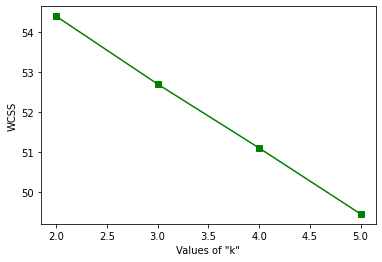

In [96]:
# plotting the wcss values
# to find out the elbow value
plt.plot(keys, values, 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('WCSS')
plt.show()

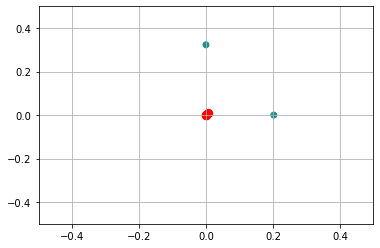

In [114]:
kmeans = KMeans(n_clusters = 3, #numero de clusters
                
init = 'k-means++', n_init = 10, #algoritmo que define a posição dos clusters de maneira mais assertiva

max_iter = 300) #numero máximo de iterações

pred_y = kmeans.fit_predict(dataset)

plt.scatter(dataset[:,1], dataset[:,0], c = pred_y) #posicionamento dos eixos x e y
plt.xlim(-0.5, 0.5) #range do eixo x
plt.ylim(-0.5, 0.5) #range do eixo y
plt.grid() #função que desenha a grade no nosso gráfico
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0], s = 70, c = 'red') #posição de cada centroide no gráfico
plt.show()

In [115]:
kmeans.cluster_centers_

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.97958809e-03,  5.62668510e-03,  2.08271233e-02, ...,
        -3.46944695e-18,  2.90579576e-02,  4.72874687e-03],
       [-8.67361738e-19, -8.67361738e-19,  0.00000000e+00, ...,
         1.90964917e-02,  2.78592140e-02, -1.73472348e-18]])